In [1]:
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt

## Load the trained model
Specify the path to the trained model and the path to the model directory. Also specify the path to the test data.

In [2]:
project_dir = 'yolov8/digit8n/'
weights = os.path.join(project_dir, 'weights/best.pt')
task = 'detect'
test_data = '/home/thjo/Datasets/BolidenDigits/test/'
# Create an image folder to store the results
os.makedirs(os.path.join(project_dir, 'test_results'), exist_ok=True)
model = YOLO(model=weights, task=task)

In [3]:
print(model.transforms)

None


In [4]:
model.model

DetectionModel(
  (model): Sequential(
    (0): Conv(
      (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (1): Conv(
      (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
      (act): SiLU(inplace=True)
    )
    (2): C2f(
      (cv1): Conv(
        (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (cv2): Conv(
        (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
    

In [5]:
test_results = model.predict('/home/thjo/Datasets/BolidenDigits/test/20220909_181144_59_20220910_232023.png', project=project_dir, conf=0.3, iou=0.6)


image 1/1 /home/thjo/Datasets/BolidenDigits/test/20220909_181144_59_20220910_232023.png: 416x416 1 0, 1 2, 1 5, 4.2ms
Speed: 0.9ms preprocess, 4.2ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)


In [6]:
print(test_results[0].boxes.cpu())

WARNING ⚠️ 'Boxes.boxes' is deprecated. Use 'Boxes.data' instead.


ultralytics.yolo.engine.results.Boxes object with attributes:

boxes: tensor([[292.8871, 104.1744, 381.6783, 369.0826,   0.8654,   5.0000],
        [ 41.6099,  66.6900,  99.2975, 306.7448,   0.7062,   2.0000],
        [208.1215,  96.3586, 281.2336, 357.2040,   0.5043,   0.0000]])
cls: tensor([5., 2., 0.])
conf: tensor([0.8654, 0.7062, 0.5043])
data: tensor([[292.8871, 104.1744, 381.6783, 369.0826,   0.8654,   5.0000],
        [ 41.6099,  66.6900,  99.2975, 306.7448,   0.7062,   2.0000],
        [208.1215,  96.3586, 281.2336, 357.2040,   0.5043,   0.0000]])
id: None
is_track: False
orig_shape: (448, 448)
shape: torch.Size([3, 6])
xywh: tensor([[337.2827, 236.6284,  88.7912, 264.9082],
        [ 70.4537, 186.7174,  57.6876, 240.0548],
        [244.6775, 226.7813,  73.1120, 260.8454]])
xywhn: tensor([[0.7529, 0.5282, 0.1982, 0.5913],
        [0.1573, 0.4168, 0.1288, 0.5358],
        [0.5462, 0.5062, 0.1632, 0.5822]])
xyxy: tensor([[292.8871, 104.1744, 381.6783, 369.0826],
        [ 41.609

In [7]:
print(test_results[0])

ultralytics.yolo.engine.results.Results object with attributes:

boxes: ultralytics.yolo.engine.results.Boxes object
keypoints: None
keys: ['boxes']
masks: None
names: {0: '0', 1: '1', 2: '2', 3: '3', 4: '4', 5: '5', 6: '6', 7: '7', 8: '8', 9: '9'}
orig_img: array([[[116,  98, 115],
        [116,  98, 115],
        [116,  98, 115],
        ...,
        [115,  97, 114],
        [115,  97, 114],
        [115,  97, 114]],

       [[116,  98, 115],
        [116,  98, 115],
        [116,  98, 115],
        ...,
        [115,  97, 114],
        [115,  97, 114],
        [115,  97, 114]],

       [[115,  97, 114],
        [115,  97, 114],
        [115,  97, 114],
        ...,
        [114,  96, 113],
        [114,  96, 113],
        [114,  96, 113]],

       ...,

       [[115,  96, 115],
        [115,  96, 115],
        [115,  96, 115],
        ...,
        [115,  97, 115],
        [116,  98, 115],
        [116,  98, 115]],

       [[115,  96, 115],
        [115,  96, 115],
        [115,  96,

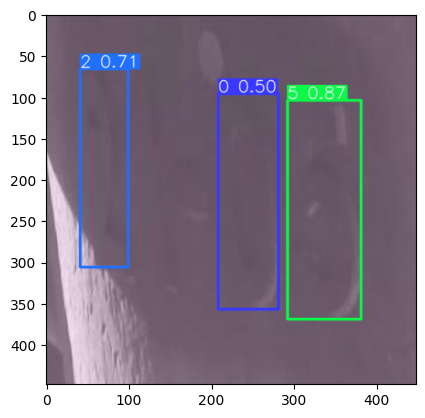

In [8]:
plt.imshow(test_results[0].plot())

In [9]:
boxes = test_results[0].boxes.cpu().numpy().data

In [10]:
%timeit test_results[0].cpu().numpy().plot()

244 µs ± 5.44 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


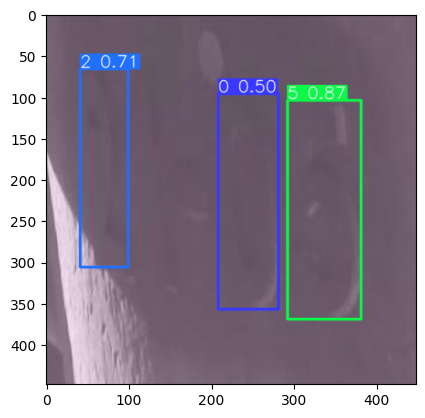

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(test_results[0].plot())

In [12]:
type(test_results[0].cpu().numpy())

ultralytics.yolo.engine.results.Results